# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлению возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [5]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Used Counter to count 'names' and other
from collections import Counter

# Used for iterations through various combinations
from itertools import product

In [6]:
# Special symbol to clear output in loops
LINE_CLEAR = '\x1b[2K'


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны.

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [7]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [8]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [9]:
data['items'][0]

{'id': '81318958',
 'premium': False,
 'name': 'Программист-стажер Data Scientist/Python',
 'department': None,
 'has_test': True,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Беговая улица',
  'building': '3с1',
  'lat': 55.776006,
  'lng': 37.5531,
  'description': None,
  'raw': 'Москва, Беговая улица, 3с1',
  'metro': {'station_name': 'Беговая',
   'line_name': 'Таганско-Краснопресненская',
   'station_id': '7.18',
   'line_id': '7',
   'lat': 55.773505,
   'lng': 37.545518},
  'metro_stations': [{'station_name': 'Беговая',
    'line_name': 'Таганско-Краснопресненская',
    'station_id': '7.18',
    'line_id': '7',
    'lat': 55.773505,
    'lng': 37.545518}],
  'id': '266346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-05-30T16:22:31+0300',
 'created_at': '2023-05-30T16:22:31+0

Сколько всего найдено вакансий

In [10]:
data['found']

303

Количество страниц в результатах поиска

In [11]:
data['pages']

31

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [12]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,response_url,sort_point_distance,published_at,...,employment.id,employment.name,salary.from,salary.to,salary.currency,salary.gross,address.metro,address,department.id,department.name
0,81318958,False,Программист-стажер Data Scientist/Python,NaN,True,False,NaN,None,None,2023-05-30T16:22:31+0300,...,probation,Стажировка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,81455393,False,Инженер QA/тестировщик,NaN,False,False,NaN,None,None,2023-06-02T11:46:36+0300,...,full,Полная занятость,200000.0,250000.0,RUR,True,NaN,NaN,NaN,NaN
2,81344000,False,Data scientist (Junior) в консалтинг,NaN,False,False,NaN,None,None,2023-05-31T10:00:40+0300,...,full,Полная занятость,40000.0,NaN,RUR,False,NaN,NaN,NaN,NaN
3,81226049,False,Data Scientist / ML-инженер,NaN,False,False,NaN,None,None,2023-05-29T11:43:04+0300,...,full,Полная занятость,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,81204383,False,Экономист-аналитик (junior/middle data scientist),NaN,False,False,NaN,None,None,2023-05-29T08:13:07+0300,...,full,Полная занятость,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [13]:
# vacancy = df['id'].iloc[0]
# vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
#
# req = requests.get(vacancy_url)
# vacancy_info = json.loads(req.content.decode())
# df_extended_ds = pd.DataFrame([vacancy_info])
#
# df_extended_ds

In [14]:
# vacancy_info

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [15]:
# df_ds = df[df['name'].str.contains('|'.join(keywords))]
# df_ds

In [16]:
# df.columns

### Data Scientist

In [17]:
# Set hh.ru url
URL = 'https://api.hh.ru/vacancies'

# Set request parameters
params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 1
}

# Request and transform to df
req = requests.get(URL, params)
data = json.loads(req.content.decode())
df = pd.json_normalize(data['items'])

In [18]:
# Keywords to look for
keywords = ['Data analyst', 'Data scientist', 'Data Engineer']

# Look for maxpage first pages
maxpage = 5

# Iterate through various parameters
for page, text in product(range(0, maxpage), keywords):
    params = {
        'text': text    ,
        'area': 1,
        'page': page,
        'per_page': 100
    }

    # Request data and transform to df
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    norm_data = pd.json_normalize(data['items'])

    # Output results of request
    print(end=LINE_CLEAR)
    print('Page: {:<3}/{:<3} Text: {:<20} | Results: {:<5}'.format(page + 1, maxpage, text, len(norm_data)), end='\r')

    # Concat results with df
    df = pd.concat([df, norm_data])

    # Sleep to avoid ddos
    sleep(0.3)

In [19]:
df.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'salary', 'response_url',
       'sort_point_distance', 'published_at', 'created_at', 'archived',
       'apply_alternate_url', 'insider_interview', 'url', 'adv_response_url',
       'alternate_url', 'relations', 'contacts', 'schedule', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'professional_roles', 'accept_incomplete_resumes', 'area.id',
       'area.name', 'area.url', 'type.id', 'type.name', 'address.city',
       'address.street', 'address.building', 'address.lat', 'address.lng',
       'address.description', 'address.raw', 'address.metro.station_name',
       'address.metro.line_name', 'address.metro.station_id',
       'address.metro.line_id', 'address.metro.lat', 'address.metro.lng',
       'address.metro_stations', 'address.id', 'employer.id', 'employer.name',
       'employer.url', 'employer.alternate_url', 'employer.logo_urls.90',

In [20]:
# Columns to drop from df
col_to_drop = ['premium', 'has_test',
               'response_letter_required', 'response_url', 'sort_point_distance',
               'published_at', 'archived', 'apply_alternate_url',
               'insider_interview', 'url', 'adv_response_url', 'alternate_url',
               'relations', 'accept_temporary',
               'accept_incomplete_resumes',
               'employer.alternate_url', 'employer.logo_urls.original',
               'employer.logo_urls.90', 'employer.logo_urls.240',
               'employer.vacancies_url', 'snippet.requirement',
               'snippet.responsibility',
               'address.metro.station_name', 'address.metro.line_name',
               'address.metro.station_id', 'address.metro.line_id',
               'address.metro.lat', 'address.metro.lng',
               'employer.logo_urls',
               'insider_interview.id', 'insider_interview.url', 'working_days',
               'working_time_intervals', 'working_time_modes']


# Drop columns and duplicates
df = df.drop_duplicates(['id'])
df = df.drop(columns=col_to_drop)

# Reset index
df = df.reset_index()
df.head()

,index,id,name,department,salary,created_at,contacts,schedule,professional_roles,area.id,...,employment.id,employment.name,address,address.metro,salary.from,salary.to,salary.currency,salary.gross,department.id,department.name
0,0,81318958,Программист-стажер Data Scientist/Python,None,None,2023-05-30T16:22:31+0300,None,None,"[{'id': '96', 'name': 'Программист, разработчи...",1,...,probation,Стажировка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,80262717,Business Development Product Analyst,None,None,2023-05-10T18:50:16+0300,None,None,"[{'id': '40', 'name': 'Другое'}]",1,...,full,Полная занятость,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,81037691,Manual QA Engineer,None,None,2023-05-25T14:38:42+0300,None,None,"[{'id': '124', 'name': 'Тестировщик'}]",1,...,full,Полная занятость,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,81243565,Аналитик данных,None,None,2023-05-29T14:44:45+0300,None,None,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",1,...,full,Полная занятость,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,81348742,"Аналитик данных (удаленно, junior/middle)",None,None,2023-05-31T10:53:58+0300,None,None,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",1,...,full,Полная занятость,NaN,NaN,100000.0,130000.0,RUR,False,NaN,NaN


In [ ]:
import openpyxl

In [23]:
# Convert this raw data to xlsx and csv
df.to_excel("../Data/DataScientist/HH-raw.xlsx", sheet_name='HH_raw')
df.to_csv("../Data/DataScientist/HH-raw.csv")

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [24]:
# Load one of the vacancies
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())
df_extended_ds = pd.DataFrame([vacancy_info])

df_extended_ds = df_extended_ds.drop(index=0)

In [25]:
# Iter through all found vacancies and load detailed information
idx = 0

# Set of unique id's
set_id = set()
for index, row in df.iterrows():
    idx += 1
    vacancy = df['id'].iloc[index]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

    # Check for correct processing
    assert not vacancy in set_id
    set_id.add(vacancy)

    # Request and convert to df
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    row_vac = pd.DataFrame([vacancy_info])

    # Concat with df
    df_extended_ds = pd.concat([df_extended_ds, row_vac])

    # Outout progress
    print(end=LINE_CLEAR)
    print('Index: {:<3} from: {:<3}'.format(idx, df.shape[0]), end='\r')

    # Sleep to avoid ddos
    sleep(0.3)

In [26]:
df_extended_ds.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages', 'errors', 'request_id'],
      dtype='object')

In [27]:
# Columns to drop from df
col_to_drop = ['premium', 'billing_type', 'relations',
               'insider_interview', 'area',
               'type', 'allow_messages',
               'employment', 'contacts',
               'branded_description', 'vacancy_constructor_template',
               'accept_handicapped', 'accept_kids', 'archived', 'response_url',
               'specializations', 'code', 'hidden',
               'quick_responses_allowed', 'driver_license_types',
               'accept_incomplete_resumes', 'published_at', 'created_at',
               'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
               'apply_alternate_url', 'has_test', 'test', 'alternate_url',
               'working_days', 'working_time_intervals', 'working_time_modes',
               'accept_temporary']


# Drop columns and duplicates (if was)
df_extended_ds = df_extended_ds.drop_duplicates(['id'])
df_extended_ds = df_extended_ds.drop(columns=col_to_drop)

# Reset index
df_extended_ds.head()

,id,name,response_letter_required,salary,address,experience,schedule,department,description,key_skills,professional_roles,employer,languages,errors,request_id
0,81318958,Программист-стажер Data Scientist/Python,False,None,"{'city': 'Москва', 'street': 'Беговая улица', ...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}",None,<p><strong>Мы приглашаем </strong></p> <p>Выпу...,"[{'name': 'Data Scientist'}, {'name': 'Python'...","[{'id': '96', 'name': 'Программист, разработчи...","{'id': '197135', 'name': 'ИК СИБИНТЕК', 'url':...",[],NaN,NaN
0,80262717,Business Development Product Analyst,False,None,None,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}",None,"<p><strong>Location:</strong> Dubai, DIFC</p> ...",[],"[{'id': '40', 'name': 'Другое'}]","{'id': '6019119', 'name': 'Дайнинно Рус', 'url...",[],NaN,NaN
0,81037691,Manual QA Engineer,False,None,None,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}",None,"<p>Мы ищем в нашу команду человека, который бу...","[{'name': 'Управление проектами'}, {'name': 'M...","[{'id': '124', 'name': 'Тестировщик'}]","{'id': '4219', 'name': 'Tele2', 'url': 'https:...",[],NaN,NaN
0,81243565,Аналитик данных,False,None,"{'city': 'Москва', 'street': 'Трифоновский туп...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}",None,"<p><em>Крупная российская компания, предоставл...","[{'name': 'Анализ данных'}, {'name': 'Python'}...","[{'id': '156', 'name': 'BI-аналитик, аналитик ...","{'id': '1643001', 'name': 'UNICA engineering',...",[],NaN,NaN
0,81348742,"Аналитик данных (удаленно, junior/middle)",False,"{'from': 100000, 'to': 130000, 'currency': 'RU...",None,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}",None,<p>Outlines Tech – это аккредитованная IT-комп...,"[{'name': 'Hadoop'}, {'name': 'Data Analysis'}...","[{'id': '156', 'name': 'BI-аналитик, аналитик ...","{'id': '4305039', 'name': 'Outlines Technologi...",[],NaN,NaN


In [28]:
df_extended_ds

,id,name,response_letter_required,salary,address,experience,schedule,department,description,key_skills,professional_roles,employer,languages,errors,request_id
0,81318958,Программист-стажер Data Scientist/Python,False,None,"{'city': 'Москва', 'street': 'Беговая улица', ...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}",None,<p><strong>Мы приглашаем </strong></p> <p>Выпу...,"[{'name': 'Data Scientist'}, {'name': 'Python'...","[{'id': '96', 'name': 'Программист, разработчи...","{'id': '197135', 'name': 'ИК СИБИНТЕК', 'url':...",[],NaN,NaN
0,80262717,Business Development Product Analyst,False,None,None,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}",None,"<p><strong>Location:</strong> Dubai, DIFC</p> ...",[],"[{'id': '40', 'name': 'Другое'}]","{'id': '6019119', 'name': 'Дайнинно Рус', 'url...",[],NaN,NaN
0,81037691,Manual QA Engineer,False,None,None,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}",None,"<p>Мы ищем в нашу команду человека, который бу...","[{'name': 'Управление проектами'}, {'name': 'M...","[{'id': '124', 'name': 'Тестировщик'}]","{'id': '4219', 'name': 'Tele2', 'url': 'https:...",[],NaN,NaN
0,81243565,Аналитик данных,False,None,"{'city': 'Москва', 'street': 'Трифоновский туп...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}",None,"<p><em>Крупная российская компания, предоставл...","[{'name': 'Анализ данных'}, {'name': 'Python'}...","[{'id': '156', 'name': 'BI-аналитик, аналитик ...","{'id': '1643001', 'name': 'UNICA engineering',...",[],NaN,NaN
0,81348742,"Аналитик данных (удаленно, junior/middle)",False,"{'from': 100000, 'to': 130000, 'currency': 'RU...",None,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}",None,<p>Outlines Tech – это аккредитованная IT-комп...,"[{'name': 'Hadoop'}, {'name': 'Data Analysis'}...","[{'id': '156', 'name': 'BI-аналитик, аналитик ...","{'id': '4305039', 'name': 'Outlines Technologi...",[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,81365057,Finance Analyst (FP&A Analyst),False,None,None,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}",None,<p><strong>MISSION </strong></p> <p>Provide in...,"[{'name': 'MS PowerPoint'}, {'name': 'Английск...","[{'id': '134', 'name': 'Финансовый аналитик, и...","{'id': '257', 'name': 'NielsenIQ', 'url': 'htt...","[{'id': 'eng', 'name': 'Английский', 'level': ...",NaN,NaN
0,80707191,"Аналитик, Data Scientist",False,None,None,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}",None,<p><strong>HUNTER&gt;MOB </strong>- это ведуща...,[],"[{'id': '10', 'name': 'Аналитик'}]","{'id': '6079433', 'name': 'Хантермоб', 'url': ...",[],NaN,NaN
0,80412928,Data Scientist,False,"{'from': 250000, 'to': 350000, 'currency': 'RU...",None,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'fullDay', 'name': 'Полный день'}",None,<p><strong>Компания</strong> - высокотехнологи...,[{'name': 'Data Science'}],"[{'id': '165', 'name': 'Дата-сайентист'}]","{'id': '8650014', 'name': 'Aimers', 'url': 'ht...","[{'id': 'eng', 'name': 'Английский', 'level': ...",NaN,NaN
0,80531457,Стажер Data scientist NLP,False,None,"{'city': 'Москва', 'street': 'Кутузовский прос...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': '3529-3529-it', 'name': 'Сбер. IT'}",<p> </p> <p> </p> <p><strong>Обязанности:</str...,"[{'name': 'Python'}, {'name': 'SQL'}]","[{'id': '96', 'name': 'Программист, разработчи...","{'id': '3529', 'name': 'СБЕР', 'url': 'https:/...",[],NaN,NaN


In [29]:
# Convert this raw data to xlsx and csv
df_extended_ds.to_excel("../Data/DataScientist/HH-extended.xlsx", sheet_name='HH_extended')
df_extended_ds.to_csv("../Data/DataScientist/HH-extended.csv")

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [30]:
print('Найдено {:<3} вакансий'.format(df_extended_ds.shape[0]))

Найдено 120 вакансий


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [34]:
# df_extended_ds

nan found


Text(0.5, 0.98, 'Круговая диаграмма необходимых навыков среди вакансий по "Data Science" и "Data Analysis"')

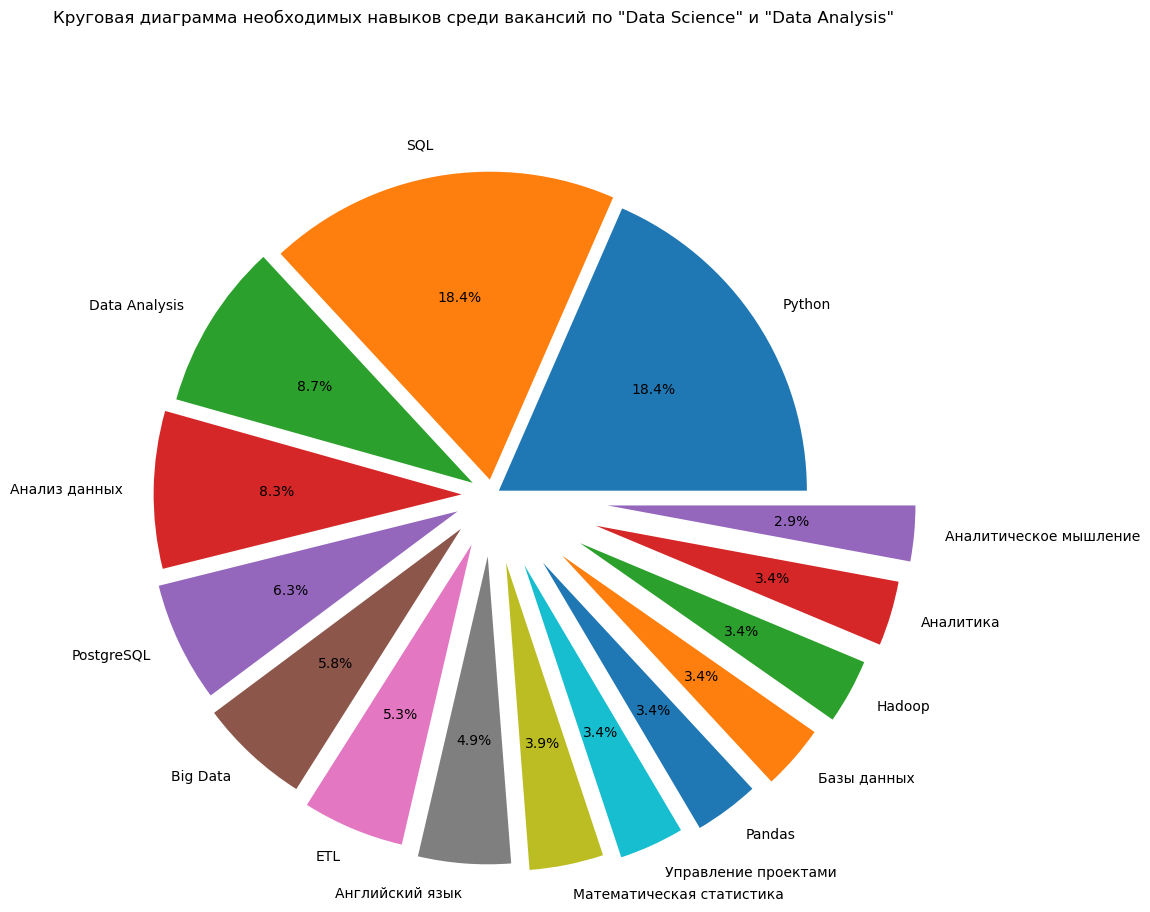

In [39]:
counter_req = Counter()

# Iter through all key skills required and count them
for index, row in df_extended_ds.iterrows():
    list_dict = row['key_skills']
    try:
        for dict_req in list_dict:
            counter_req.update({dict_req['name'] : 1})
    except:
        print("nan found")
dict_for_req = dict(counter_req)

# Get 15 most required skills
df_req = pd.Series(dict_for_req).nlargest(15)

# Plot pie chart with key skills required
df_req.plot.pie(autopct='%1.1f%%', figsize=(15, 10), explode=[0.025 * i for i in range(1,16)])
plt.suptitle('Круговая диаграмма необходимых навыков среди вакансий по "Data Science" и "Data Analysis"')

Можно заметить, что среди навыков встречаются 'Анализ данных' и 'Data Analysis'. Предположительно, различия в этих двух навыках нет.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Зарплата указана в 35 из 120 вакансий (29.166666666666668 %)


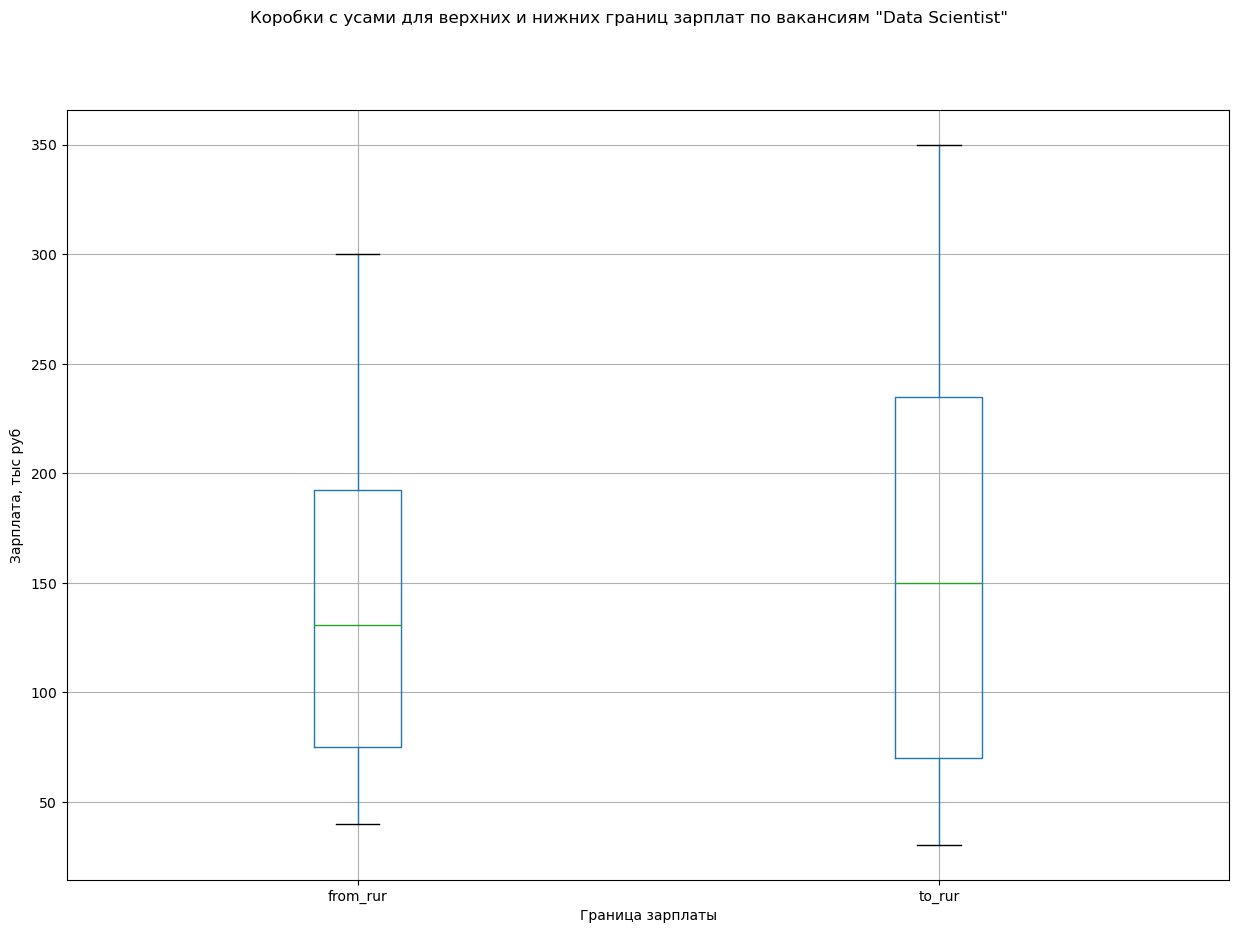

In [40]:
# There is no RUR in the Central European Bank
# from currency_converter import CurrencyConverter
# CurRates = CurrencyConverter()

# Convert to USD
def convert_cur(amount, from_cur):
    coef = 1.
    if from_cur == 'USD':
        coef = 75.47
    if from_cur == 'EUR':
        coef = 80.08
    return amount * coef


def convert_gross(amount, gross):
    coef = 1.
    if gross:
        coef = 0.87
    return amount * coef


# Prepare df with salaries
df_salary = df_extended_ds[['salary']].dropna()
df_salary = df_salary['salary'].apply(pd.Series)

# df_salary['tmp'] = df_salary.apply(lambda x: CurRates.convert(x['from'], x['currency'], 'USD'), axis=1)

# Convert 'from', 'to' columns to USD
df_salary['from_rur'] = df_salary.apply(lambda x: convert_cur(x['from'], x['currency']), axis=1)
df_salary['to_rur'] = df_salary.apply(lambda x: convert_cur(x['to'], x['currency']), axis=1)

df_salary['from_rur'] = df_salary.apply(lambda x: convert_gross(x['from_rur'], x['gross']), axis=1)
df_salary['to_rur'] = df_salary.apply(lambda x: convert_gross(x['to_rur'], x['gross']), axis=1)
df_salary = df_salary.drop(columns=['from', 'to', 'currency', 'gross'])


(df_salary / 1000).boxplot(column=['from_rur', 'to_rur'], showfliers=False, figsize=(15, 10))

# Format ticks
plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

# Add a title and axis labels to the plot
plt.suptitle('Коробки с усами для верхних и нижних границ зарплат по вакансиям "Data Scientist"')
plt.xlabel('Граница зарплаты')
plt.ylabel('Зарплата, тыс руб')

print(f'Зарплата указана в {df_salary.shape[0]} из {df_extended_ds.shape[0]} вакансий ({100. * df_salary.shape[0] / df_extended_ds.shape[0]} %)')

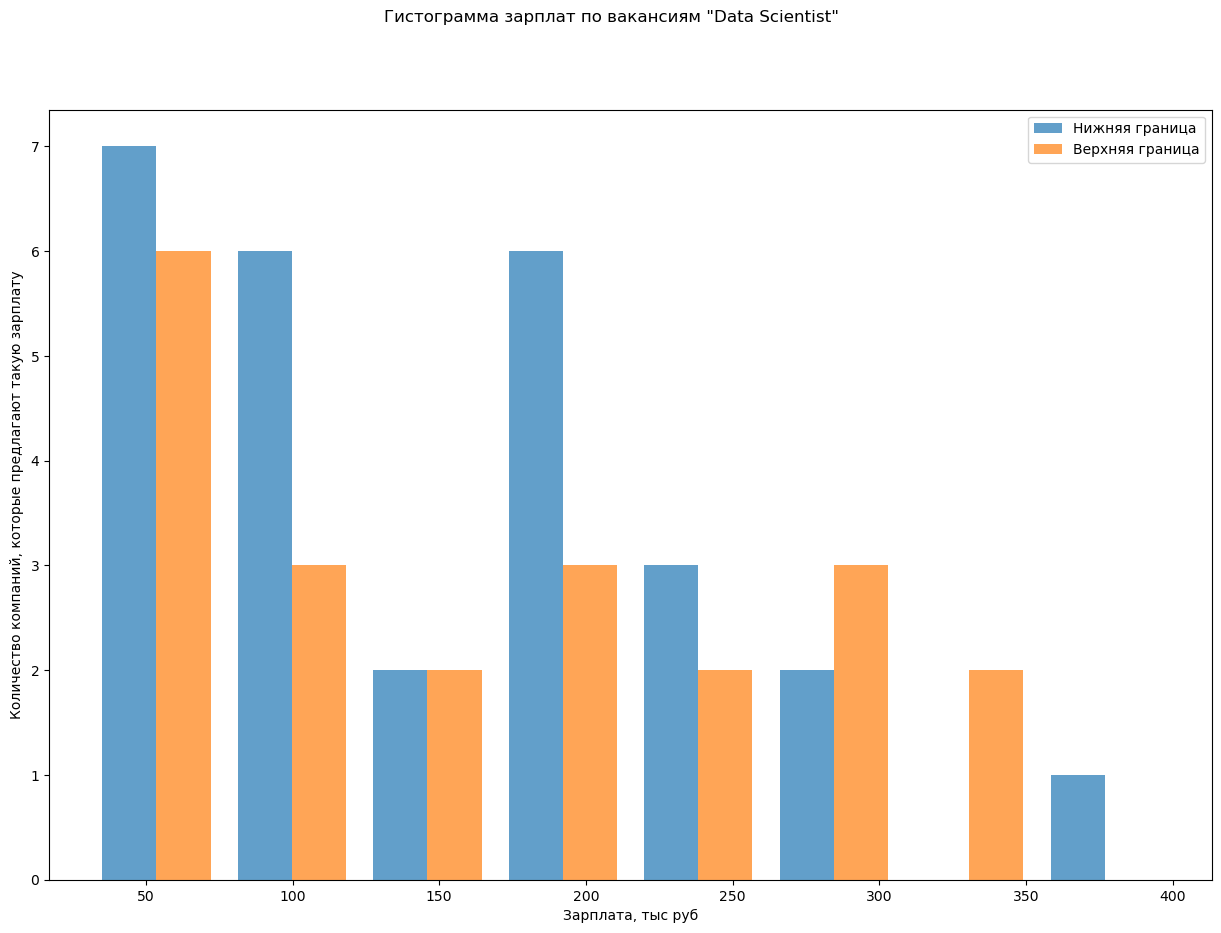

In [41]:
# Plot parameters
plt.rcParams["figure.figsize"] = (15,10)
bins = 8

# Plot
fig, ax = plt.subplots()
ax.hist([(df_salary / 1000)['from_rur'], (df_salary / 1000)['to_rur']], bins=bins, alpha=0.7)
# (df_salary / 1000).hist(column=['from_rur'], figsize=(15, 10), bins=16)

# Format ticks
plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

# Add a title and axis labels to the plot
plt.suptitle('Гистограмма зарплат по вакансиям "Data Scientist"')
plt.ylabel('Количество компаний, которые предлагают такую зарплату')
plt.xlabel('Зарплата, тыс руб')
plt.legend(['Нижняя граница', 'Верхняя граница'])


Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

### ML Engineer

In [42]:
# Set hh.ru url
URL = 'https://api.hh.ru/vacancies'

# Set request parameters
params = {
    'text': "ML Engineer",
    'area': 1,
    'page': 0,
    'per_page': 1
}

# Request and transform to df
req = requests.get(URL, params)
data = json.loads(req.content.decode())
df = pd.json_normalize(data['items'])

In [43]:
# Keywords to look for
keywords = ['Machine Learning', 'Computer Vision', 'NLP', 'ML Engineer']

# Iterate through various parameters
for page, text in product(range(0, 5), keywords):
    params = {
        'text': text    ,
        'area': 1,
        'page': page,
        'per_page': 100
    }

    # Request data and transform to df
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    norm_data = pd.json_normalize(data['items'])

    # Output results of request
    print(end=LINE_CLEAR)
    print('Page: {:<3} Text: {:<20} | Results: {:<5}'.format(page, text, len(norm_data)), end='\r')

    # Concat results with df
    df = pd.concat([df, norm_data])

    # Sleep to avoid ddos
    sleep(0.3)

In [44]:
# Columns to drop from df
col_to_drop = ['premium', 'has_test',
               'response_letter_required', 'response_url', 'sort_point_distance',
               'published_at', 'archived', 'apply_alternate_url',
               'insider_interview', 'url', 'adv_response_url', 'alternate_url',
               'relations', 'accept_temporary',
               'accept_incomplete_resumes',
               'employer.alternate_url', 'employer.logo_urls.original',
               'employer.logo_urls.90', 'employer.logo_urls.240',
               'employer.vacancies_url', 'snippet.requirement',
               'snippet.responsibility',
               'address.metro.station_name', 'address.metro.line_name',
               'address.metro.station_id', 'address.metro.line_id',
               'address.metro.lat', 'address.metro.lng',
               'employer.logo_urls',
               'insider_interview.id', 'insider_interview.url', 'working_days',
               'working_time_intervals', 'working_time_modes']


# Drop columns and duplicates
df = df.drop_duplicates(['id'])
df = df.drop(columns=col_to_drop)

# Reset index
df = df.reset_index()
df.head()

,index,id,name,department,address,created_at,contacts,schedule,professional_roles,area.id,...,address.building,address.lat,address.lng,address.description,address.raw,address.metro_stations,address.id,address.metro,department.id,department.name
0,0,80219982,Стажер-аналитик,NaN,NaN,2023-05-10T10:22:17+0300,None,None,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,81226049,Data Scientist / ML-инженер,NaN,NaN,2023-05-29T11:43:04+0300,None,None,"[{'id': '10', 'name': 'Аналитик'}]",1,...,2к2,55.804471,37.590335,NaN,"Москва, Новодмитровская улица, 2к2","[{'station_name': 'Дмитровская', 'line_name': ...",2793828,NaN,NaN,NaN
2,1,81421643,Аналитик ML,NaN,NaN,2023-06-01T15:31:19+0300,None,None,"[{'id': '10', 'name': 'Аналитик'}]",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,81020580,Data Scientist (Python),NaN,NaN,2023-05-25T11:50:23+0300,None,None,"[{'id': '165', 'name': 'Дата-сайентист'}]",1,...,1с12,55.800863,37.554717,NaN,"Москва, Северный административный округ, улица...",[],6153521,NaN,NaN,NaN
4,3,80281257,Data Scientist,NaN,NaN,2023-05-11T09:49:48+0300,None,None,"[{'id': '165', 'name': 'Дата-сайентист'}]",1,...,2к2,55.804471,37.590344,NaN,"Москва, Новодмитровская улица, 2к2","[{'station_name': 'Дмитровская', 'line_name': ...",11590064,NaN,NaN,NaN


In [45]:
# Convert this raw data to xlsx and csv
df.to_excel("../Data/MLEngineer/HH-raw.xlsx", sheet_name='HH_raw')
df.to_csv("../Data/MLEngineer/HH-raw.csv")

In [46]:
# Load one of the vacancies
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())
df_extended_ml = pd.DataFrame([vacancy_info])

df_extended_ml = df_extended_ml.drop(index=0)

In [47]:
# Iter through all found vacancies and load detailed information
idx = 0

# Set of unique id's
set_id = set()
for index, row in df.iterrows():
    idx += 1
    vacancy = df['id'].iloc[index]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

    # Check for correct processing
    assert not vacancy in set_id
    set_id.add(vacancy)

    # Request and convert to df
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    row_vac = pd.DataFrame([vacancy_info])

    # Concat with df
    df_extended_ml = pd.concat([df_extended_ml, row_vac])

    # Outout progress
    print(end=LINE_CLEAR)
    print('Index: {:<3} from: {:<3}'.format(idx, df.shape[0]), end='\r')

    # Sleep to avoid ddos
    sleep(0.3)

In [51]:
# Columns to drop from df
col_to_drop = ['premium', 'billing_type', 'relations',
               'insider_interview', 'area',
               'type', 'allow_messages',
               'employment', 'contacts',
               'branded_description', 'vacancy_constructor_template',
               'accept_handicapped', 'accept_kids', 'archived', 'response_url',
               'specializations', 'code', 'hidden',
               'quick_responses_allowed', 'driver_license_types',
               'accept_incomplete_resumes', 'published_at', 'created_at',
               'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
               'apply_alternate_url', 'has_test', 'test', 'alternate_url',
               'working_days', 'working_time_intervals', 'working_time_modes',
               'accept_temporary']


# Drop columns and duplicates (if was)
# df_extended_ml = df_extended_ml.drop_duplicates(['id'])
# df_extended_ml = df_extended_ml.drop(columns=col_to_drop)

# Reset index
df_extended_ml.head()

,errors,request_id
0,"[{'value': 'captcha_required', 'captcha_url': ...",1685731524043d6b2ebe7aba44ee4388
0,"[{'value': 'captcha_required', 'captcha_url': ...",1685731524406f8e17107b3e659d3db3
0,"[{'value': 'captcha_required', 'captcha_url': ...",1685731525073d0f41de95521ef6bf4b
0,"[{'value': 'captcha_required', 'captcha_url': ...",16857315254449d984b01cde36315249
0,"[{'value': 'captcha_required', 'captcha_url': ...",1685731525799ca0c586d89bdf42e48b


In [ ]:
# Convert this raw data to xlsx and csv
df_extended_ml.to_excel("../Data/MLEngineer/HH-extended.xlsx", sheet_name='HH_extended')
df_extended_ml.to_csv("../Dataes (GPT, GPT pro/MLEngineer/HH-extended.csv")

In [ ]:
print('Найдено {:<3} вакансий'.format(df_extended_ml.shape[0]))

In [ ]:
counter_req = Counter()
# Iter through all key skills required and count them
for index, row in df_extended_ml.iterrows():
    list_dict = row['key_skills']
    for dict_req in list_dict:
        counter_req.update({dict_req['name'] : 1})
dict_for_req = dict(counter_req)

# Get 15 most required skills
df_req = pd.Series(dict_for_req).nlargest(15)

# Plot pie chart with key skills required
df_req.plot.pie(autopct='%1.1f%%', figsize=(15, 10), explode=[0.025 * i for i in range(1,16)])
plt.suptitle('Круговая диаграмма необходимых навыков среди вакансий по "Machine learning Engineer"')

In [ ]:
# There is no RUR in the Central European Bank
# from currency_converter import CurrencyConverter
# CurRates = CurrencyConverter()

# Convert to USD
def convert_cur(amount, from_cur):
    coef = 1.
    if from_cur == 'USD':
        coef = 75.47
    if from_cur == 'EUR':
        coef = 80.08
    return amount * coef


def convert_gross(amount, gross):
    coef = 1.
    if gross:
        coef = 0.87
    return amount * coef


# Prepare df with salaries
df_salary = df_extended_ml[['salary']].dropna()
df_salary = df_salary['salary'].apply(pd.Series)

# df_salary['tmp'] = df_salary.apply(lambda x: CurRates.convert(x['from'], x['currency'], 'USD'), axis=1)

# Convert 'from', 'to' columns to USD
df_salary['from_rur'] = df_salary.apply(lambda x: convert_cur(x['from'], x['currency']), axis=1)
df_salary['to_rur'] = df_salary.apply(lambda x: convert_cur(x['to'], x['currency']), axis=1)

df_salary['from_rur'] = df_salary.apply(lambda x: convert_gross(x['from_rur'], x['gross']), axis=1)
df_salary['to_rur'] = df_salary.apply(lambda x: convert_gross(x['to_rur'], x['gross']), axis=1)
df_salary = df_salary.drop(columns=['from', 'to', 'currency', 'gross'])


(df_salary / 1000).boxplot(column=['from_rur', 'to_rur'], showfliers=False, figsize=(15, 10))

# Format ticks
plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

# Add a title and axis labels to the plot
plt.suptitle('Коробки с усами для верхних и нижних границ зарплат по вакансиям "Machine learning Engineer"')
plt.xlabel('Граница зарплаты')
plt.ylabel('Зарплата, тыс руб')

print(f'Зарплата указана в {df_salary.shape[0]} из {df_extended_ml.shape[0]} вакансий ({100. * df_salary.shape[0] / df_extended_ml.shape[0]} %)')

In [ ]:
# Plot parameters
plt.rcParams["figure.figsize"] = (15,10)
bins = 8

# Plot
fig, ax = plt.subplots()
ax.hist([(df_salary / 1000)['from_rur'], (df_salary / 1000)['to_rur']], bins=bins, alpha=0.7)
# (df_salary / 1000).hist(column=['from_rur'], figsize=(15, 10), bins=16)

# Format ticks
plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

# Add a title and axis labels to the plot
plt.suptitle('Гистограмма зарплат по вакансиям "ML Engineer"')
plt.ylabel('Количество компаний, которые предлагают такую зарплату')
plt.xlabel('Зарплата, тыс руб')
plt.legend(['Нижняя граница', 'Верхняя граница'])


### Выводы
Во-первых, стоит отметить, что на рынке достаточно много вакансий по заданным запросам "Data Scientist", "ML Engineer" - 1047 и 633 соответственно (числа могут немного отличаться в ноутбуке, тк позже перезапускал его).

Во-вторых, то что касается необходимых навыков. Всегда преобладают некоторые из них: SQL, Python, и либо Анализ данных (в Data Science), либо Machine Leaarning (В MLEngineer). Также прослеживается следующая зависимость. В Вакансиях по MLEngineer необходимы более 'технические навыки', в то время как от Data Scientist'а требуется глубокое знание различных баз данных, более аналитический подход к решению задач, знание индустрии и умения презентовать исследования.

В-третьих, то что касается зарплат. Стоит отметить, что среди всех вакансий встречается тенденция не указывать нижнюю границу зарплат, поэтому она может быть нерепрезентативной в рамках общей картины, хотя дает хорошее представление о том, на что может рассчитывать новичок в этой области. По итогу зарплата указаны примерно у 15% всех вакансий, что говорит о том, что реальные зарплаты могут сильно отличаться, предположительно в большую сторону.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


### Data Scientist

In [ ]:
# Rename column
def rename_exp(name):
    if '1' in name and '3' in name:
        return '1 to 3'
    if '3' in name and '6' in name:
        return '3 to 6'
    if '6' in name:
        return '>6'
    return 'No exp'


# Prepare df with salaries
df_exp = df_extended_ds[['experience']].dropna()
df_exp_len = df_exp.shape[0]
df_exp = df_exp['experience'].apply(pd.Series)['id'].apply(rename_exp).dropna()

# Count different variants
counter_exp = Counter
dict_exp = dict(counter_exp(df_exp))
df_exp = pd.DataFrame.from_dict(dict_exp, orient='index', columns=['amount']).reset_index()

# Reindex to plot
df_exp = df_exp.reindex([2, 1, 0, 3])
# Plot bar plot
df_exp.plot.bar(x='index', y='amount', figsize=(15, 10), rot=0)

# Format ticks
plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

# Add a title and axis labels to the plot
plt.suptitle('Количество вакансий по требуемому опыту')
plt.legend('')
plt.xlabel('Требуемый опыт')
plt.ylabel('Число вакансий')

print(f'Требуемы опыт указан в {df_exp_len} из {df_extended_ds.shape[0]} вакансий ({100. * df_exp_len / df_extended_ds.shape[0]} %)')

За отсутствие конкретного определения "ТОПА" компаний в задаче, будем искать компании с наибольшим числом вакансий. Т.е. в данном случае компания тем лучше, чем больше вакансий она предлагает на рынке по данному запросу. Этот критерий будет отражать популярность компании на рынке труда в это время. (Можно было бы оценивать компании по средним зарплатам, но мне кажется, что такой критерий на такой маленькой выборке будет не очень репрезентативным, поскольку средняя зарплата от компании будет сильно зависеть от представляемых вакансий.)

In [ ]:
# Prepare df with salaries
df_comp_vac = df_extended_ds[['employer']].dropna()
df_comp_vac_len = df_comp_vac.shape[0]
df_comp_vac = df_comp_vac['employer'].apply(pd.Series)['name']

# Count different variants
counter_exp = Counter
dict_comp_vac = dict(counter_exp(df_comp_vac))
df_comp_vac = pd.DataFrame.from_dict(dict_comp_vac, orient='index', columns=['amount']).reset_index()

# Get top 15
df_comp_vac = df_comp_vac.nlargest(15, columns=['amount'])

# Plot bar plot
df_comp_vac.plot.bar(x='index', y='amount', figsize=(15, 10), rot=35)

# Format ticks
plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

# Add a title and axis labels to the plot
plt.suptitle('Топ компаний по количеству вакансий в области "Data Science"')
plt.legend('')
plt.xlabel('Компании')
plt.ylabel('Число вакансий')

In [ ]:
# Read first df with address info
df_address = pd.read_csv('../Data/DataScientist/HH-raw.csv')
df_address = df_address[['name', 'address.lat', 'address.lng']].dropna()
df_address.head()

In [ ]:
# Add includes
from geopy.geocoders import Nominatim
from urllib.request import urlopen
import plotly.express as px

In [ ]:
# Plot interactive map with locations
px.set_mapbox_access_token(open("../Data/Token/.mapbox_token").read())

df = px.data.carshare()
fig = px.scatter_mapbox(df_address,
                        lat=df_address['address.lat'],
                        lon=df_address['address.lng'],
                        hover_name=df_address['name'],
                        )
fig.write_html("../Pictures/Map.html")
fig.show()

In [ ]:
# Function to get district from coordinates
def get_district(lat, lng):
    add_dict = Nominatim(user_agent='user_agent').reverse((lat, lng), addressdetails=True).raw['address']
    sleep(0.3)
    if 'suburb' in add_dict.keys():
        return add_dict['suburb']
    return float('NaN')

df_address['district'] = df_address.apply(lambda x: get_district(x['address.lat'], x['address.lng']), axis=1)
df_address.head()

In [ ]:
# Prepare df with salaries
df_district = df_address['district']

# Count different variants
counter_district = Counter
dict_district = dict(counter_district(df_district))
df_district = pd.DataFrame.from_dict(dict_district, orient='index', columns=['amount']).reset_index()

#
df_address['amount'] = df_district['amount']


# Plot bar plot of top 15
df_district.nlargest(15, columns=['amount']).plot.bar(x='index', y='amount', figsize=(15, 10), rot=35)

# Format ticks
plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

# Add a title and axis labels to the plot
plt.suptitle('Топ районов по количеству вакансий в них по запросу области "Data Science"')
plt.legend('')
plt.xlabel('Районы москвы')
plt.ylabel('Число вакансий')

In [ ]:
# This cell does not work (but without errors)

# geojson for Moscow districts
with urlopen('https://gis-lab.info/data/mos-adm/mo.geojson') as response:
    districts = json.load(response)

# Plot district heatmap
fig = px.choropleth_mapbox(df_address, geojson=districts,
                           locations='address.lat',
                           color='amount',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3,
                           opacity=0.7,
                           )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Выводы
Какие выводы можно сделать из построенных графиков?

Требуемый стаж для работы обычно это от 1 до 3 лет, реже от 3 до 6. Очень мало вакансий, не требующих опыта. Что может затруднить поиски работы новичкам в области. Но этому могут помочь различные стажировки, которые не отображаются на hh.ru.

В топ-15 компаний по количеству вакансий входит ряд компаний указанных, на графике. Стоит отметить, что большую часть рынка занимает СБЕР, а далее спрос падает примерно экспоненциально. Отсюда возникает гипотеза, что СБЕР сейчас испытывает сильную нехватку кадров в этой области. Другие же технические компании в топе - ожидаемые, поскольку индустрия предполагает наличие подобных запросов на "Data Science". Хотя то, что Спортмастер в топе - удивительно.

Топ районов по вакансиям представлен на графике, а их распределение на карте. (Тепловая карта популярности районов почему-то не сторится, предполагаю что названия в geojson отличаются от тех, что есть в DF, поэтому он не выводит на карту все эти районы)